# 目標:
學習 BASEMAP的進階應用


# 重點:

導入PANDAS, 利用PANDAS 的數據繪製關係圖

如何自行輸入經緯度繪製所在區域的地圖

學習如何讀取氣象資訊檔: netCDF4


# 作業

1. 讀入 etopo5 地形/降水量資料集: "etopo5.cdf". 繪製分布圖.


2. 延續使用者資料的導入使用, 除了, "文字檔", "網路資訊", 還有圖像檔;

所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖



# 溫馨提示: 

有疑問, 請多提出來, 有專家陪跑

dict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


C:\Users\Username\Anaconda3\envs\kkk512_env\lib\site-packages\ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\Username\Anaconda3\envs\kkk512_env\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


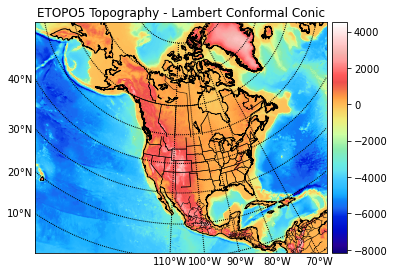

In [99]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# 讀入 etopo5 地形/降水量。.
#url = 'https://github.com/NOAA-PMEL/FerretDatasets/blob/master/data/etopo5.cdf'
# 要確認資料集所在路徑
etopodata = Dataset('etopo5.cdf')


# 取得資料集裡的資料定義, 使用variables.keys()
print(etopodata.variables.keys())


# 匯入資料 使用variables['keys'][:]

#print(etopodata.variables['ETOPO05_X'][:])
#print(etopodata.variables['ETOPO05_Y'][:])
#print(etopodata.variables['ROSE'][:])
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
topoin = etopodata.variables['ROSE'][:]

# 移位資料, 使 lon 從 - 180 到 180, 而不是 20 到 380 
topoin,lons = shiftgrid(180.,topoin,lons,start=False)
#print(topoin)

# 繪製地形/降水量
# 創建圖形和軸實例
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#設定地理資訊圖('lcc' = lambert conformal conic).
# 使用 Wgs84 橢圓體的主要和次要球體半徑, 做基礎的底圖
# 請填入 resolution='??',area_thresh=???.,projection='??'
# area_thresh 為一數字, 低於這個數字不呈現

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=10000.,projection='lcc',\
            #lon_0=90,lat_0=90.,lat_ts=lats,ax=ax)
            lat_1=50.,lon_0=-107.,ax=ax)
            #lat_0=50,lon_0=-107.,lat_ts=50,ax=ax)

# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1

topodat = m.transform_scalar(topoin,lons,lats,nx,ny)

# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_haxby)
#劃定海岸線和邊境界限, 總共需要3個參數

#m.drawmapboundary(fill_color = None)   # 繪製邊界
m.drawstates(color='k')        # 繪製州
m.drawcoastlines(color='k')    # 繪製海岸線
#m.fillcontinents(color='coral',lake_color='aqua')


# 繪製經緯線
# 設定地圖左側和底部的標籤
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(-110.,-60.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

x, y = lons, lats
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]

#cs = m.contourf(x,y,topoin,clevs,cmap=cm.s3pcpn)
# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()


C:\Users\Username\Anaconda3\envs\kkk512_env\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


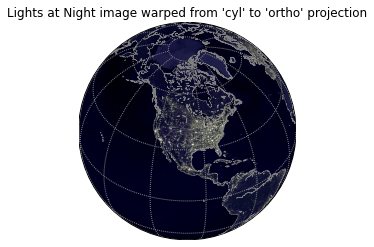

In [42]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# 說明使用warpimage method 方法顯示圖像背景。
# 在地圖投影區域。 預設背景是『藍色。
#來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

# 建立新圖像
fig=plt.figure()
# 定義以北美為中心的正交投影.
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')



C:\Users\Username\Anaconda3\envs\kkk512_env\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plot native cylindrical map (no warping needed) ...


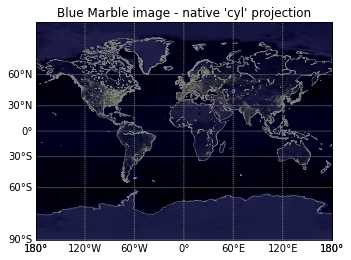

In [66]:




# 建立新圖像
fig

#新定義圓柱形等距投影。
m = Basemap(projection='mill',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')

# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5')


# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()